In [95]:
import geopandas as gpd
import contextily as cx
import urbangrammar_graphics as ugg
from matplotlib_scalebar.scalebar import ScaleBar
import rioxarray
from rasterio import features
import matplotlib.pyplot as plt
import shapely

In [10]:
settlements = gpd.read_parquet("settlement_boundaries.parquet")

In [2]:
url = "zip+https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_FUA_UCDB2015_GLOBE_R2019A/V1-0/GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0.zip!GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0.gpkg"
fua = gpd.read_file(url)

In [3]:
fua = fua[fua.Cntry_name == "UnitedKingdom"]

In [4]:
fua = fua[~fua.eFUA_name.isin(["Londonderry/Derry", "Belfast", "Bangor"])].dissolve("eFUA_name")  # resolve NI and Larbert split

In [5]:
tiles = cx.providers.CartoDB.Positron
tiles_labels = cx.providers.CartoDB.PositronOnlyLabels

In [6]:
from matplotlib.patches import Patch

In [11]:
bds_plot = settlements.set_geometry(settlements.simplify(100)).to_crs(3857)
fua_plot = fua.to_crs(3857)

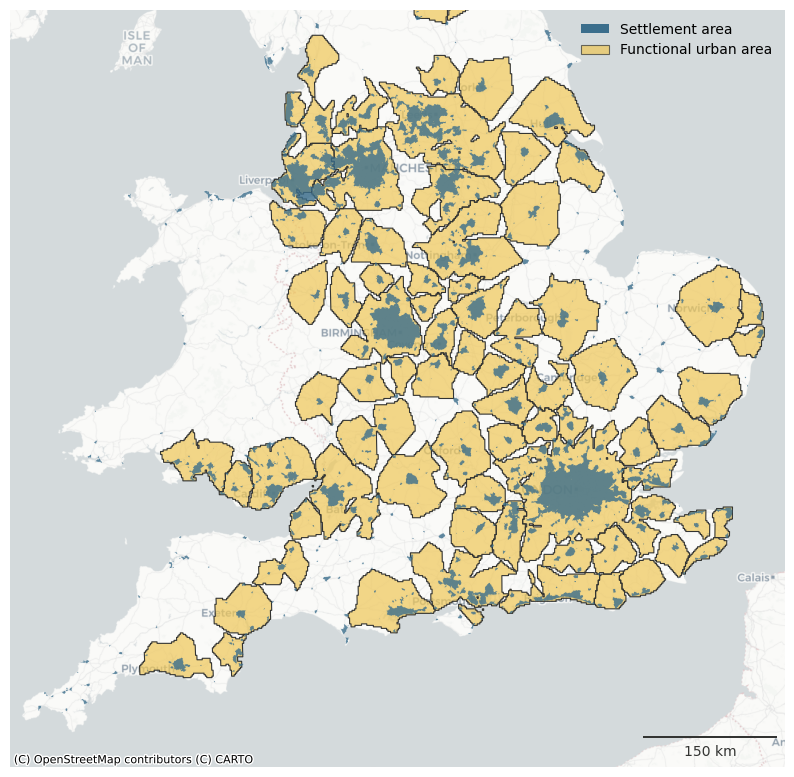

In [12]:
ax = bds_plot.plot(color=ugg.COLORS[1], figsize=(10, 10), zorder=10, alpha=.8)
# bds_plot.boundary.plot(ax=ax, color=ugg.COLORS[0], linewidth=.75)
fua_plot.plot(ax=ax, alpha=.7, color=ugg.COLORS[4])
# fua_plot.boundary.plot(ax=ax, alpha=1, color=ugg.COLORS[4], linewidth=1)
fua_plot.boundary.plot(ax=ax, alpha=1, color=ugg.COLORS[0], linewidth=.8)
ax.set_ylim(6400000, 7250000)
ax.set_xlim(-650000, 220000)
ax.set_axis_off()
cx.add_basemap(ax=ax, source=tiles.build_url(scale_factor="@2x"), attribution=tiles.attribution)

legend_elements = [
    Patch(facecolor=ugg.COLORS[1], label='Settlement area'),
    Patch(facecolor=ugg.COLORS[4], alpha=.7, edgecolor=ugg.COLORS[0], linewidth=.8, label='Functional urban area'),
]
ax.legend(handles=legend_elements, loc='upper right', frameon=False)

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

In [174]:
dou = rioxarray.open_rasterio("zip+https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_SMOD_GLOBE_R2023A/GHS_SMOD_E2030_GLOBE_R2023A_54009_1000/V2-0/GHS_SMOD_E2030_GLOBE_R2023A_54009_1000_V2_0.zip/GHS_SMOD_E2030_GLOBE_R2023A_54009_1000_V2_0.tif", masked=True)

In [156]:
dou = dou.rio.clip_box(*bds_plot.to_crs(dou.rio.crs).total_bounds)

In [157]:
dou = dou.sel(band=1)

In [158]:
cities = dou.where(dou > 21)

In [150]:
cities = cities.rio.reproject(bds_plot.crs)

In [159]:
shapes = [shapely.geometry.shape(s[0]) for s in features.shapes(cities, mask=cities> 21, transform=cities.rio.transform(3857))]

In [169]:
dou_cities = gpd.GeoSeries(shapes, crs=cities.rio.crs).to_crs(bds_plot.crs)

In [164]:
dou_cities.explore()

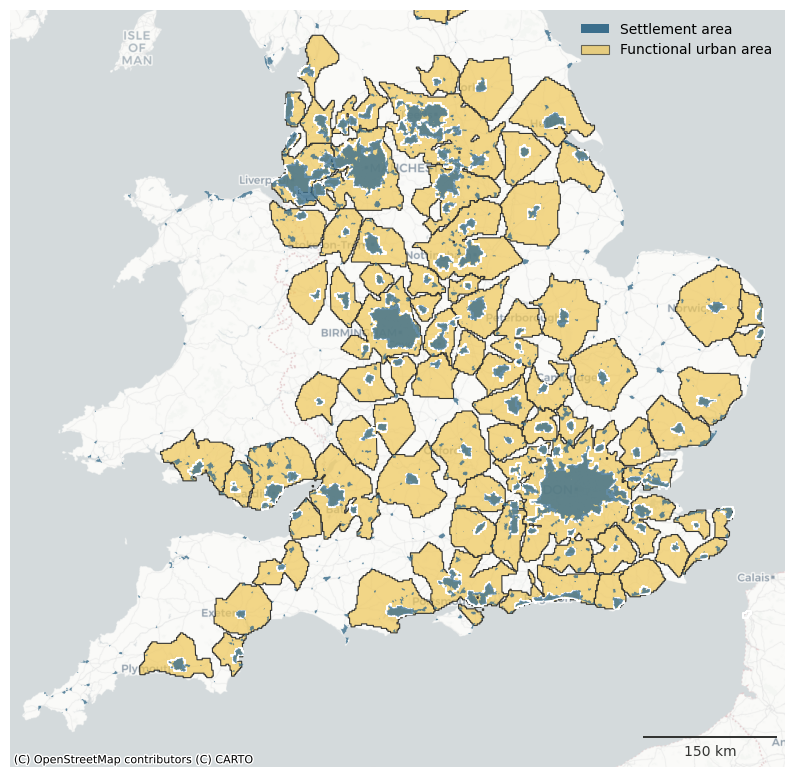

In [ ]:
ax = bds_plot.plot(color=ugg.COLORS[1], figsize=(10, 10), zorder=10, alpha=.8)
# bds_plot.boundary.plot(ax=ax, color=ugg.COLORS[0], linewidth=.75)
fua_plot.plot(ax=ax, alpha=.7, color=ugg.COLORS[4])
# fua_plot.boundary.plot(ax=ax, alpha=1, color=ugg.COLORS[4], linewidth=1)
fua_plot.boundary.plot(ax=ax, alpha=1, color=ugg.COLORS[0], linewidth=.8)
ax.set_ylim(6400000, 7250000)
ax.set_xlim(-650000, 220000)
ax.set_axis_off()
cx.add_basemap(ax=ax, source=tiles.build_url(scale_factor="@2x"), attribution=tiles.attribution)

legend_elements = [
    Patch(facecolor=ugg.COLORS[1], label='Settlement area'),
    Patch(facecolor=ugg.COLORS[4], alpha=.7, edgecolor=ugg.COLORS[0], linewidth=.8, label='Functional urban area'),
]
ax.legend(handles=legend_elements, loc='upper right', frameon=False)

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

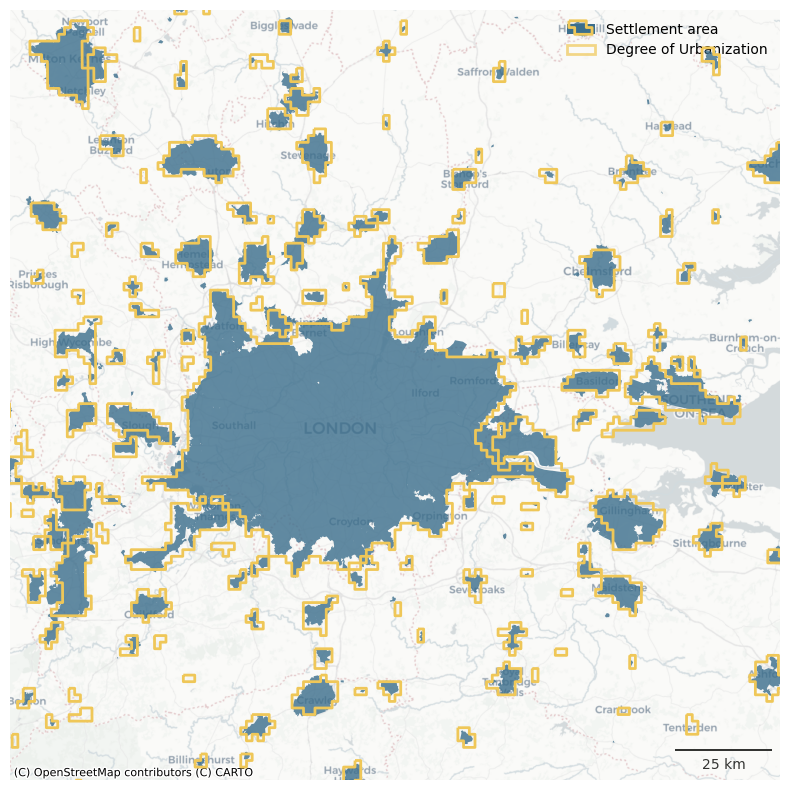

In [170]:
ax = bds_plot.plot(color=ugg.COLORS[1], figsize=(10, 10), zorder=10, alpha=.8)
# bds_plot.boundary.plot(ax=ax, color=ugg.COLORS[0], linewidth=.75)
# fua_plot.boundary.plot(ax=ax, alpha=1, color=ugg.COLORS[4], linewidth=1)
dou_cities.boundary.plot(ax=ax, alpha=1, color=ugg.COLORS[4], linewidth=2, zorder=11)
ax.set_ylim(6620000, 6820000)
ax.set_xlim(-100000, 100000)
ax.set_axis_off()
cx.add_basemap(ax=ax, source=tiles.build_url(scale_factor="@2x"), attribution=tiles.attribution)

legend_elements = [
    Patch(facecolor=ugg.COLORS[1], label='Settlement area'),
    Patch(facecolor='none', alpha=.7, edgecolor=ugg.COLORS[4], linewidth=2, label='Degree of Urbanization'),
]
ax.legend(handles=legend_elements, loc='upper right', frameon=False)

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

In [167]:
dou_cities.crs

<Projected CRS: ESRI:54009>
Name: World_Mollweide
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mollweide
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [101]:
7250000 - 6400000

850000

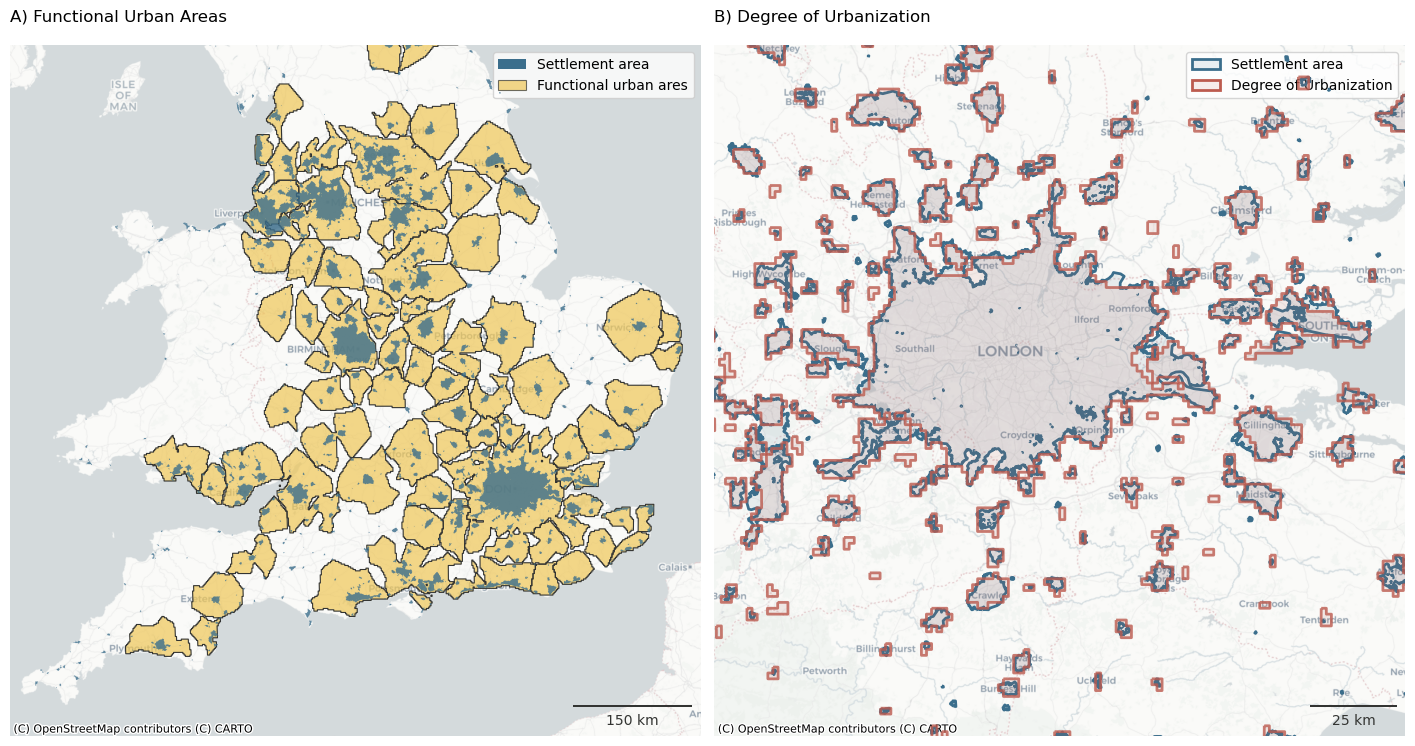

In [171]:
f, axs = plt.subplots(1, 2, figsize=(18, 10))

bds_plot.plot(color=ugg.COLORS[1], figsize=(10, 10), zorder=10, alpha=.8, ax=axs[0])
fua_plot.plot(ax=axs[0], alpha=.7, color=ugg.COLORS[4])
fua_plot.boundary.plot(ax=axs[0], alpha=1, color=ugg.COLORS[0], linewidth=.8)
axs[0].set_ylim(6400000, 7270000)
axs[0].set_xlim(-650000, 220000)
axs[0].set_axis_off()
cx.add_basemap(ax=axs[0], source=tiles.build_url(scale_factor="@2x"), attribution=tiles.attribution)

legend_elements = [
    Patch(facecolor=ugg.COLORS[1], label='Settlement area'),
    Patch(facecolor=ugg.COLORS[4], alpha=.7, edgecolor=ugg.COLORS[0], linewidth=.8, label='Functional urban ares'),
]
axs[0].legend(handles=legend_elements, loc='upper right', frameon=True)

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
axs[0].add_artist(scalebar)
axs[0].set_title("A) Functional Urban Areas", loc='left')

bds_plot.boundary.plot(color=ugg.COLORS[1], figsize=(10, 10), zorder=10, alpha=1, ax=axs[1], linewidth=2)
dou_cities.boundary.plot(ax=axs[1], alpha=.8, color=ugg.COLORS[2], linewidth=2, zorder=11)
bds_plot.plot(color=ugg.COLORS[1], figsize=(10, 10), zorder=10, alpha=.1, ax=axs[1], linewidth=2)
dou_cities.plot(ax=axs[1], alpha=.1, color=ugg.COLORS[2], linewidth=2, zorder=11)
axs[1].set_ylim(6600000, 6800000)
axs[1].set_xlim(-100000, 100000)
axs[1].set_axis_off()
cx.add_basemap(ax=axs[1], source=tiles.build_url(scale_factor="@2x"), attribution=tiles.attribution)

legend_elements = [
    Patch(facecolor=ugg.COLORS[1] + (.1,), label='Settlement area', edgecolor=ugg.COLORS[1], linewidth=2),
    Patch(facecolor=ugg.COLORS[2] + (.1,), edgecolor=ugg.COLORS[2], linewidth=2, label='Degree of Urbanization'),
]
axs[1].legend(handles=legend_elements, loc='upper right', frameon=True)

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
axs[1].add_artist(scalebar)
axs[1].set_title("B) Degree of Urbanization", loc='left')

plt.subplots_adjust(wspace=.02,)
plt.savefig("figs/overlay.png", dpi=144, bbox_inches="tight")

In [139]:
ugg.COLORS[1] + (0.1,)

(0.23046875, 0.4296875, 0.55078125, 0.1)

In [172]:
dou_cities.to_crs(27700).area.median() / 100_000

np.float64(40.086878912840554)

In [173]:

dou_cities.to_crs(27700).area.mean() / 100_000

np.float64(145.50587564837517)

In [148]:
bds_plot.to_crs(27700).area.median() / 100_000

np.float64(10.949069948914829)